## Investigation into the numpy.random package
#### Hayley Doherty

---

### *Explain the overall purpose of the package*

Randomness refers to a lack of pattern or predictability. Individual random events are unpredictable, however the frequency of different possible outcomes following numerous events is predictable. Random number generation is the creation of a number or sequence of numbers that cannot by reasonably predicted better than by random chance [1]. 

There are two types of random number generators, true random number generators (TRNGs) and pseudo-random number generators (PRNGs). PRNGs produce pseudo-random numbers with the use of deterministic algorithms from some initial seed meaning that if the seed is obtained it is possible to reproduce the seemingly random numbers. The numpy.random package is a PRNG and will be discussed in detail below. Briefly, TRNGs generate random numbers from physical random processes. They require a source of entropy which is the measure of a system's thermal energy per unit temperature unavailable for useful work [2]; the amount of entropy is also a measure of the molecule disorder (randomness) of a system [3]. Electrical noise is a good source of entropy for TRNGs due to the unpredictability of white noise. As there is no seed which can be used to determine the random numbers, TRNGs can guarantee a high level of security and play an important role in information communications and cryptography [2].

As mentioned above, the numpy.random package is a PRNG which generates seemingly random but still reproducible numbers. It is Python's most widely used tool for generating random data. Until recently, this package used an algorithm called Marsenne Twister to generate pseudo-random data; PCG64 is now used in the latest version of the numpy package.

The overall purpose of the NumPy.ranodm package is to generate pseudo-random numbers drawn from a specified distribution based on parameters input by the user.

___

### *Explain the use of the "Simple random data" and "Permutations" functions*
### Simple Random Data
### 1. Integers Generator
___

The integers generator returns pseudo-random integers. Below are pieces of code used to describe the function of the integers generator.

When run with a single argument, the integers generator outputs a single number between 0 and up to but not including the number inserted into the function. 

In [21]:
import numpy as np
# setting variable rng to random number generator object
rng = np.random.default_rng()

import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

import seaborn as sns

from scipy import stats

In [1]:
# input the integers generator with some arguments to determine its function
rng.integers(2)

0

When run with two arguments, the integers generator outputs a single number between the first and second argument, including the lower but not higher argument

In [2]:
rng.integers(2, 9)

7

Icluding an argument called size allows you to specify the amount of numbers output by the function.

In [3]:
rng.integers(0, 10, size=100)

array([4, 1, 0, 6, 2, 9, 5, 9, 3, 6, 1, 4, 5, 8, 5, 8, 0, 3, 3, 0, 8, 8,
       3, 3, 2, 0, 5, 9, 7, 8, 1, 8, 6, 5, 2, 0, 0, 5, 8, 9, 3, 7, 3, 0,
       7, 7, 1, 9, 8, 0, 3, 3, 0, 3, 6, 5, 7, 7, 0, 0, 0, 3, 3, 1, 9, 1,
       5, 1, 5, 9, 0, 8, 8, 2, 8, 5, 2, 5, 9, 3, 8, 8, 9, 7, 6, 2, 2, 8,
       4, 8, 6, 6, 6, 2, 9, 7, 0, 7, 5, 8], dtype=int64)

To visualize the number of time each number is randomly returned, we can plot the frequency of the numbers returned in a histogram which will enable us to better understand the distribution of the output.

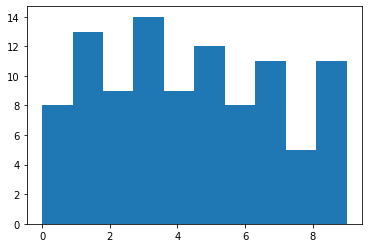

In [4]:
x = rng.integers(0, 10, size=100)
plt.hist(x)
plt.show()

When the sample size used is relatively small (100) it can be hard to determine the true distribution of the returned values and so to do this we can use a larger number in the size parameter to increase the output.


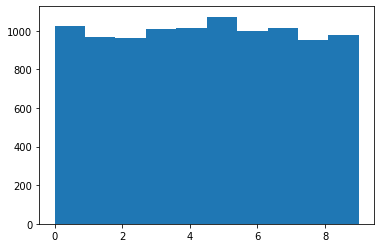

In [5]:
x = rng.integers(0, 10, size=10000)
plt.hist(x)
plt.show()

When we increase the output to 10,000 we can see that there is roughly the same amount of numbers in each bracket meaning that there is an equal chance of any number being output. THis is called a uniform distribution.

Below we will consider what happens when two values are given for the size argument. An array containing multiple arrays in output. We can determine that the number 2 refers to the number of rows to be output and the number 4 to the number of columns. All the values in both arrays are between 0 and 5 (not inclusive of 5) as determined by the first argument.

In [6]:
rng.integers(0, 5, size=(2, 4))

array([[3, 2, 0, 3],
       [1, 2, 4, 1]], dtype=int64)

Looking at the docuentation we can see that the fourth parameter that can be set in the function is dtype. It describes how the bytes of memory corresponding to an array item should be interpreted [4]. This parameter is optional and does not have to be specified. When no other type is set, the default value is np.int64. This means that the value is stored as a 64 bit integer.

The fifth parameter, called endpoint, is a boolean option. As seen below,  when endpoint is set to True, the high number which is usually not included in the values output, is now included.

In [7]:
rng.integers(0, 5, size=(10, 5), endpoint= True)

array([[3, 0, 2, 4, 5],
       [2, 3, 5, 3, 4],
       [0, 5, 0, 3, 5],
       [4, 0, 1, 5, 2],
       [2, 4, 4, 1, 4],
       [1, 3, 0, 2, 5],
       [3, 0, 4, 3, 5],
       [2, 3, 0, 5, 0],
       [3, 4, 4, 1, 1],
       [3, 1, 5, 1, 2]], dtype=int64)

When endpoint is set to False, the high number is not included in the values output. This is the default value for the endpoint parameter.

In [8]:
rng.integers(0, 5, size=(10, 5), endpoint= False)

array([[2, 2, 0, 1, 1],
       [0, 2, 3, 2, 3],
       [3, 2, 1, 4, 4],
       [2, 4, 3, 2, 4],
       [2, 4, 0, 1, 3],
       [3, 1, 4, 0, 1],
       [1, 3, 1, 2, 3],
       [2, 3, 3, 3, 3],
       [4, 2, 3, 0, 4],
       [1, 3, 1, 0, 3]], dtype=int64)

---

### 2. Random

The random generator returns pseudo-random floating-point numbers between 0.0 and 1.0 in the half-open interval meaning the outputs will be greater or equal to 0 and less than 1. Running the random generator with no arguments outputs a single floating point number. 

In [9]:
rng.random()

0.220737681518533

Icluding a single parameter dictates the size of the output. 

In [10]:
rng.random(10)

array([0.47261475, 0.59261895, 0.64651312, 0.28482313, 0.06015615,
       0.15560495, 0.60803636, 0.81324414, 0.412915  , 0.8871088 ])

Below is a histogram of the output from the random generator showing that there are roughly the same amount of values in each bracket which would imply that the ouput is random and there is no proclivity for certain numbers to be returned over others

In [11]:
x = rng.random(10000)

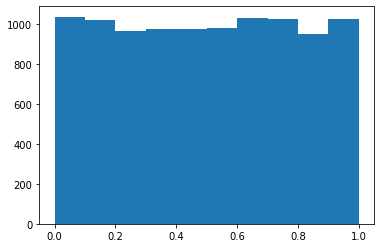

In [12]:
plt.hist(x)
plt.show()

Multiple numbers given as arguments to the random generator, similar to the above integer generator, outputs an array or mulpile arrays. However unlike above with the integer generator, the arguments must be enclosed in parentheses. 

In [13]:
rng.random(2, 10)

TypeError: Cannot interpret '10' as a data type

The function below outputs 2 arrays each consisting of 10 floating point numbers between 0 and 1.

In [ ]:
rng.random((2, 10), )

The second parameter that can be given as input is concerned with the data type. Here only float64 and float32 are supported and if neither is explicitly stated, the default is float64. In this generator the dtype is not returned in the ouput as is the case with the integer generator.

The third parameter seems to have to be given outside of the parentheses and can alter the ouput so that it returns numbers other than those between 0 and 1. By putting -5 after the function, the number output are now between -4 and -5.

In [ ]:
rng.random((10),np.float64) - 5

Using the example from the documentation, 'multiplying' the function seems to increase the range of numbers output. As seen below, the output now spans the rangle of 0 to -5 as opposed to above when the output was only in the range of -4 to -5.

In [ ]:
5 * rng.random((10),np.float64) - 5

In [ ]:
x = 5 * rng.random((1000),np.float64) - 5
plt.hist(x)
plt.show()

Multiplying the function by 10 increases the range of numbers output to 10, i.e. from -5 to 5. 

In [ ]:
x = 10 * rng.random((1000),np.float64) - 5
plt.hist(x)
plt.show()

---

### 3. Choice Generator

The choice generator when given a single parameter such as an integer or an array, will return a single random output. If a single integer is input, the output will be a random value from the range 0 to the value specified. If an array is provided, the output will be a randomly selected item from the array.

In [ ]:
rng.choice(5)

In [ ]:
rng.choice([2, 3, 5, 7, 8])

The second parameter than can be input is the size parameter which allows the user to specify the number of outputs as well as the output shape.

In [ ]:
rng.choice([1, 2, 3, 4, 5], 3)

In [ ]:
rng.choice([1, 2, 3, 4, 5], (3, 5))

In [ ]:
rng.choice([1, 2, 3, 4, 5], (5, 3))

The third parameter called replace takes a boolean input and is optional. This determines whether or not values in the ouput are repeated. If set to true then the output can be repeated, this is the default setting if not otherwise specified.

In [ ]:
rng.choice([1, 2, 3, 4, 5, 6, 7, 8], 5, replace=True)

If set to false then there will be no repetition of values in the output.

In [ ]:
rng.choice([1, 2, 3, 4, 5, 6, 7, 8], 5, replace=False)

If replace is set to false, the size of the output must be less than or equal to the number of values in the input or an error will occur.

In [ ]:
rng.choice([2, 3, 5, 8], 5, replace=False)

Until now the oupt given by the choice generator assumes a uniform distribution meaning that each value given as input has the same chance at being randomly selected in the output; as can be seen in the histograms below.

In [ ]:
x = rng.choice(10, 10000, replace=True)
plt.hist(x)
plt.show()

The fourth parameter, *p*, allows the user to specify the probability associated with each entry of the input [5]. The values of the probabilities specified should add to 1 or an error will occur. This parameter allowd the user to determine which inputs will appear more often and which less often in the output.

In [ ]:
rng.choice([2, 3, 5, 8], 10, replace=True, p=[0.1, 0.6, 0.2, 0.1])

The above array item with the highest probability value appears more often, follwed by the item with the second highest probability value. 

The fifth parameter is called axis, is optional and allows for specification of the axis along which the selection is performed.

In [ ]:
rng.choice(6, (6, 3), axis=1)

In [ ]:
rng.choice(6, (6, 3), axis=0)

In [ ]:
rng.choice(6, (6, 3), axis=2)

In [ ]:
rng.choice(6, (6, 3), axis=3)

The last parameter which can be specified for the choice generator is called shuffle. This takes the form of a boolean and determines whether the output is shuffled when run without replacement.

In [ ]:
rng.choice(6, 5, replace=False, shuffle=True)

In [ ]:
rng.choice(6, 5, replace=False, shuffle=False)

---

### 4. Bytes

The last of the Simple Random Generators is called Bytes. It returns a string of bytes to the length specified. The only parameter to be input is the length or number of random bytes.

In [ ]:
rng.bytes(5)

In [ ]:
# output from above is saved as x
x = b'\x1d\x002\x06\xe8'
len(x)   # Getting the length of x to show it is the same as the length input into the bytes generator


---

### Permutations

### 1. Shuffle

Shuffle modifies a given sequence by changing the order in which items appear. Unlike the previous generators, shuffle does not return anything as output, the list or array must be explicitly called again to view the newly shuffled sequence. As shuffle rearranges the order of a sequence, all items in the sequence appear once.

In [ ]:
a = np.arange(10)
rng.shuffle(a)
a

Single integers cannot be inserted directly into the shuffle function and must first be changed to a range. This is unlike other generators in the NumPy random package which will assume a range from 0 to single parameter given. 

In [ ]:
rng.shuffle(4)

A range or list must first be stored in a variable so the newly shuffled sequence can be viewed.

In [ ]:
x = np.arange(10)
rng.shuffle(x)
x

---

### 2. Permutation

Permutation is similar the the shuffle generator in that it rearranges a sequence. Permutation returns the permuted sequence without the need to store it as a variable and recall the variable. If a single integer is passed into the fuction, a range from 0 to that number will be used by the function.

In [ ]:
rng.permutation(5)

In [ ]:
rng.permutation([1, 2, 3, 4, 5, 6, 7, 8, 9])

If multiple arrays are passed into the function, it will alter the sequence of the arrays and not the items contained in them.

In [ ]:
rng.permutation([[7, 8, 9], [4, 5, 6], [1, 2, 3]])

If the optional second parameter called axis is set to 1, this changes the axis which is shuffled so that the order of the arrays stays the same but their contents are permuted.

In [ ]:
rng.permutation([[1, 2, 3], [4, 5, 6], [7, 8, 9]], axis = 1)

---

### *Explain the use and purpose of five 'Distributions' functions*
### 1. Uniform
As the name suggests, this function outputs samples uniformly from a given interval. This means that every number has an equal chance of being output. 

If an integer is given as a parameter into the function, it will ouput a single floating point number between 0 and the number entered (but will not output the given number). For example when 5 is passed as a parameter, a value in the range of 0 to 4.9 can be output but 5 will never be returned.

In [ ]:
rng.uniform(5)

If 2 parameters are passed into the function, the first acts as the lower bound and the second as the upper bound from which the output number is drawn.

In [ ]:
rng.uniform(5, 10)

The third parameter is called size and dictates the number and size of the output that is returned by the function. If a single value is given for size, an array with that number of items is returned.

In [ ]:
rng.uniform(5, 10, 50)

If 2 values are given for the size parameter, multiple arrays that meet the shape specified will be returned.

In [ ]:
rng.uniform(5, 10, (5, 3))

In [ ]:
rng.uniform(5, 10, (3, 5))

By graphing a large number of values output from the uniform function, we can see that there is roughly equal number of values output across the range defined in the function. Because of this it can be used to desribe the probability where every event has an equal chance of occuring. Due to the shape of the graph, it iis sometimes called the rectanglular distribution.

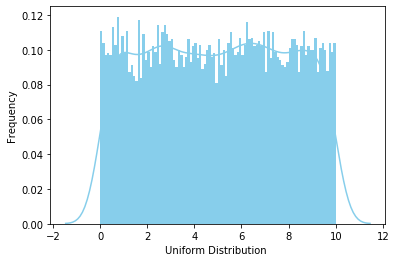

In [14]:
ax = rng.uniform(0, 10, 10000)

x = sns.distplot(ax, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
x.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

In [ ]:
from scipy import stats
stats.describe(ax)

---

### 2. Normal Distribution

Normal distributions, sometimes called bell curve or Gaussian distributions, can be observed in a wide variety of measurements, such as people's heights, IQ scores and sizes of snowflakes [6]. To generate range of samples that are normally distributed in NumPy, two parameters must be given, the mean and standard deviation. The mean establishes the location of the peak of the distribution and the standard distribution determines the width of the distribution [6].

In [16]:
bx = rng.normal(0, 0.1, 10000)

In [17]:
abs(0 - np.mean(bx))

0.0008726636161159689

Below is a histogram of the normal distribution function. The peak of the distribution is at 0 as we set this as out mean in the function. The spread of values is in the range of about -0.3 to 0.3. 

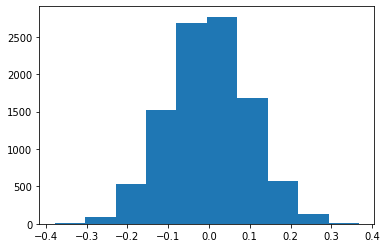

In [18]:
plt.hist(bx)
plt.show()

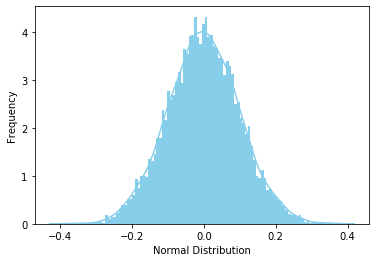

In [19]:
x = sns.distplot(bx, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
x.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [22]:
stats.describe(bx)

DescribeResult(nobs=10000, minmax=(-0.3781137099876101, 0.3679754086774991), mean=-0.0008726636161159689, variance=0.009933956374598853, skewness=0.024232168126267193, kurtosis=-0.004122848092046105)

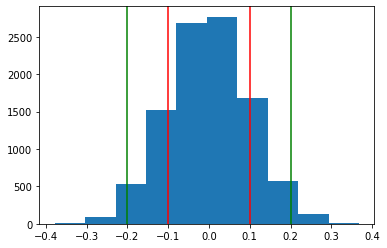

In [23]:
plt.hist(bx)
plt.axvline(x= -0.1, c = 'red')
plt.axvline(x= 0.1, c = 'red')
plt.axvline(x= -0.2, c = 'green')
plt.axvline(x= 0.2, c = 'green')
plt.show()

The red lines below indicate one standard deviation from the mean. 68% of all the values output will fall into this range [7].The green bars represent two standard deviations out from the mean. The range between these bars contains 95% of the output. This is called the 95% confidence interval and is an important concept in statistics. 

---

### 3. Chi-square Distribution

The chi-square distribution is the distribution of the sum of squared standard normal deviates. The degrees of freedom of the distribution is equal to the number of standard normal deviates being summed. The degrees of freedom in a chi-square distribution is also its mean and the greater the dregrees of freedom is, the more the distribution resembles a normal distribution [8].

The chisquare function in the NumPy.random package returns samples from a chi-square distribution based on the parameters inserted into the function.

The first parameter is the degrees of freedom. This can be any floating point number above 0. As mentioned above, the degrees of freedom is the number of independent standard normal samples that are squared and summed.

In [ ]:
rng.chisquare(0.2)

The second parameter is the size of the output desired. This determines the size and shape of the output and if none are specified a single value is returned.

In [ ]:
rng.chisquare(1,4)

In [ ]:
(rng.chisquare(4,(2,5)))

Using a histogram plot the values returned we can see that it does resemble a normal distribution but it is skewed to one side. The raph shows us that the random numbers generated are more likely to be low value numbers

In [ ]:
x = rng.chisquare(3,10000)
plt.hist(x)
plt.show()

In [ ]:
stats.describe(x)

In [ ]:
np.median(x)

Looking at some simple descriptive statistics we can see that the mean value is 3 which is equal to the degrees of freedom entered into the function. The median of the output is 2.4, together these 2 descriptive values tell us that roughly half of the values returned are less than the value of the degrees of freedom, 3, and the other half is sread across the remaining range, from 3 up to roughly 22. 

---

### 4. Exponential Distribution

The exponential distribution is the probability distribution of the times between events, for example the time until an earthquake occurs. Values for an exponential random variable have more small values compared to large values.

The NumPy exponential generator takes a parameter called scale or scale parameter, an inverse of the rate parameter which is the rate at which events occur.

Supplying the exponential generator with just a scale parameter and np size parameter will output a single sample from the parameterized exponential distribution.

In [ ]:
rng.exponential(5)

In [ ]:
x = rng.exponential(6, size=10000)
plt.hist(x)
plt.show()

In [ ]:
ax = sns.distplot(x, kde=True, bins=100, color='skyblue',
hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

In [ ]:
stats.describe(x)

In [ ]:
np.std(x)

In the exponential distribution, the standard deviation is equal to the mean, which is the same as the scale parameter used in the generator function.

---

### 5. Gamma Distribution

While the exponential distribution predicts the amount of time for the next event to occur, the gamma distribution predicts the wait time for the *nth* event to occur.

In NumPy random variables are drawn from a Gamma distribution with specified parameters, shape and scale. The scale is the rate at which events occur and the shaoe refers to the number of events we are waiting to happen [9]

Supplying the shape and scale parameters into the gamma distribution generator will output a single floating point number, which is the default when no size is given.

In [ ]:
rng.gamma(2, 2)

Below are plots of the output when the same parameters are given for shape and scale as above. The rangle of random numbers generated is from roughly 0.06 to 22.7 with a mean of 4.

In [ ]:
x = rng.gamma(2, 2, size=10000)
plt.hist(x)
plt.show()

In [ ]:
ax = sns.distplot(x, kde=True, bins=100, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')
plt.show()

In [ ]:
stats.describe(x)

In [ ]:
np.std(x)

---

### *Explain the use of seeds for in generating Pseudo-random numbers*
---

NumPy's random package uses a BitGenerator to produce a stream of random bits based on a single random bit, the seed. The BitGenerators in the NumPy package take an arbitrary sized, positive integer, or list of integers as a seed [1]. By setting the seed you can ensure that the numbers produced by the random package are deterministic and you will be able to reproduce the same 'random' numbers time and again. If the seed is not specifically set, the operating system is used to provide random data to be used, for example from the clock.

The BitGenerator processes this input into internal state for the generator which accesses a number of methods to generate random numbers drawn from one of a variety of probability distributions.

In the current version of NumPy (v1.19), the BitGenerator is called PCG64. This has been changed from the Mersenne Twister (MT19937) which was previously used by NumPy. The Permuted Congruential Generator is a 128-bit implementation of O'Neill's permutation congruential generator. It is considered to have more desirable properties compared to other random number generators, including good statistical propeties and mathematical foundations, a lack of predictability, cryptographic security and good time and space performance [10]. The specific member of the PCG family used by the NumPy random package was specifically selected due to its design to make attempts at state reconstruction especially difficult thus enhancing its security [10]. 

In [ ]:
seed = 101
rng = np.random.default_rng(seed)
rng.random()

In [ ]:
seed = 101  # reset the seed
rng = np.random.default_rng(seed)
rng.random()

Above is an example of setting the seed to a fixed integer and returning the same 'random' number each time the NumPy random package is run.

___

### References

[1]. Random number generation; https://en.wikipedia.org/wiki/Random_number_generation

[2]. Entropy, https://www.britannica.com/science/entropy-physics

[3]. True Random Number Generators Using Electrical Noise, IEEE Access; https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8822724

[4]. Data Type Objects, NumPy v1.19 Manual; https://numpy.org/doc/stable/reference/arrays.dtypes.html?highlight=dtype

[5]. NumPy Random Module with Examples; https://medium.com/analytics-vidhya/numpy-random-module-numpy-random-examples-cec1b531c1b8

[6]. Why are Normal Distributions Normal?, Aidan Lyon; Brit. J. Phil. Sci. 65 (2014), 621–649.

[7]. Mean and Standard Deviation, The BMJ;  https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/2-mean-and-standard-deviation

[8]. Chi-Square Statistic: How to Calculate It / Distribution; https://www.statisticshowto.com/probability-and-statistics/chi-square/#chisquaredist

[9] Gamma Distribution- Intuition, Derivation and Examples, https://towardsdatascience.com/gamma-distribution-intuition-derivation-and-examples-55f407423840

[10]. PCG: A Family of Simple, Fast, Space-Efficient Statistically Good Algorithms for Random Number Generation, Melissa E. O'Neill; https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf